### Wheat Dataset 

The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a __binary (2-class) classification problem__. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable. The variable names are as follows:

    - Area.
    - Perimeter.
    - Compactness
    - Length of kernel.
    - Width of kernel.
    - Asymmetry coefficient.
    - Length of kernel groove.
    - Class (1, 2, 3).
    
The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 28%.

MORE INFORMATION --> http://archive.ics.uci.edu/ml/datasets/seeds

DOWNLOAD -- >http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt


In [1]:
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9300  100  9300    0     0  47448      0 --:--:-- --:--:-- --:--:-- 47692


In [2]:
!mkdir data 

In [3]:
!mv seeds_dataset.txt data/

In [5]:
!head -n 3 data/seeds_dataset.txt

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1


In [6]:
!cat data/seeds_dataset.txt| wc -l 

     209


In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical

## Step 1: Load the Data and aswering the question

In [88]:
Wheat = pd.read_csv('./data/seeds_dataset.txt', header=None, delimiter='\t+')
Wheat

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [89]:
Wheat.columns = ['Area','Perimeter','Compactness','Length of kernel','Width of kernel','Asymmetry coefficient','Length of kernel groove','Class']

In [90]:
Wheat

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [91]:
Wheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [92]:
Wheat.Class.unique()

array([1, 2, 3], dtype=int64)

**SO:** The problem here to build a classifier that can classify the class of the wheat seed based on these features:
- Area.
- Perimeter.
- Compactness
- Length of kernel.
- Width of kernel.
- Asymmetry coefficient.
- Length of kernel groove.

## Step 2: Check data for problems 

In [93]:
Wheat.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [94]:
Wheat.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

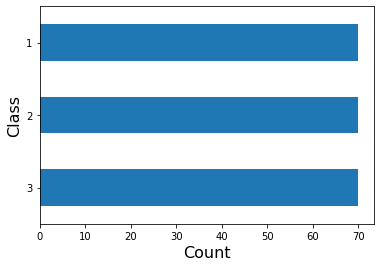

In [95]:
Wheat.Class.value_counts().plot(kind='barh')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Class', fontsize=16);

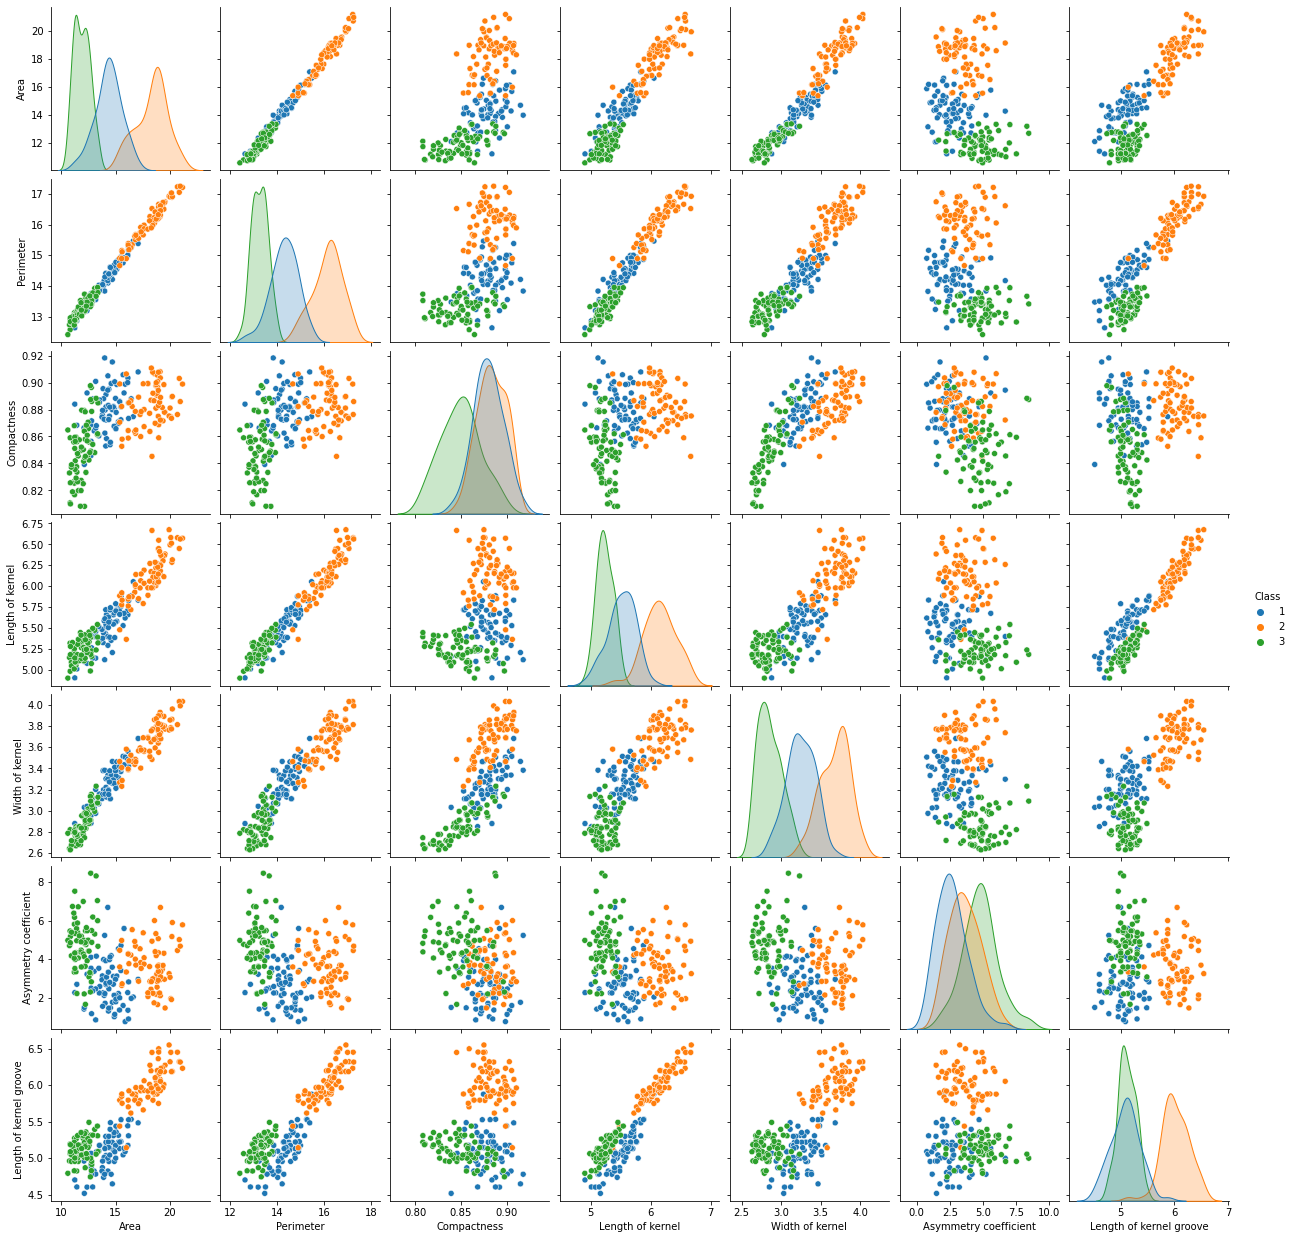

In [96]:
sns.pairplot(Wheat, hue='Class',palette='tab10')

In [339]:
Wheat

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


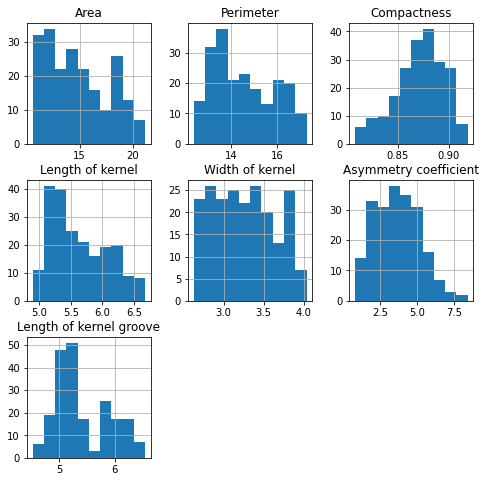

In [97]:
Wheat.iloc[:,:-1].hist(figsize=(8,8));

## Step 3: Tidying the data


In [396]:
index_to_drop = Wheat.query('`Length of kernel groove` < 5.5 and Class == 2').index

In [397]:
New_Wheat = Wheat.drop(index=index_to_drop).reset_index(drop=True)

In [398]:
New_Wheat

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
203,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
204,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
205,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
206,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


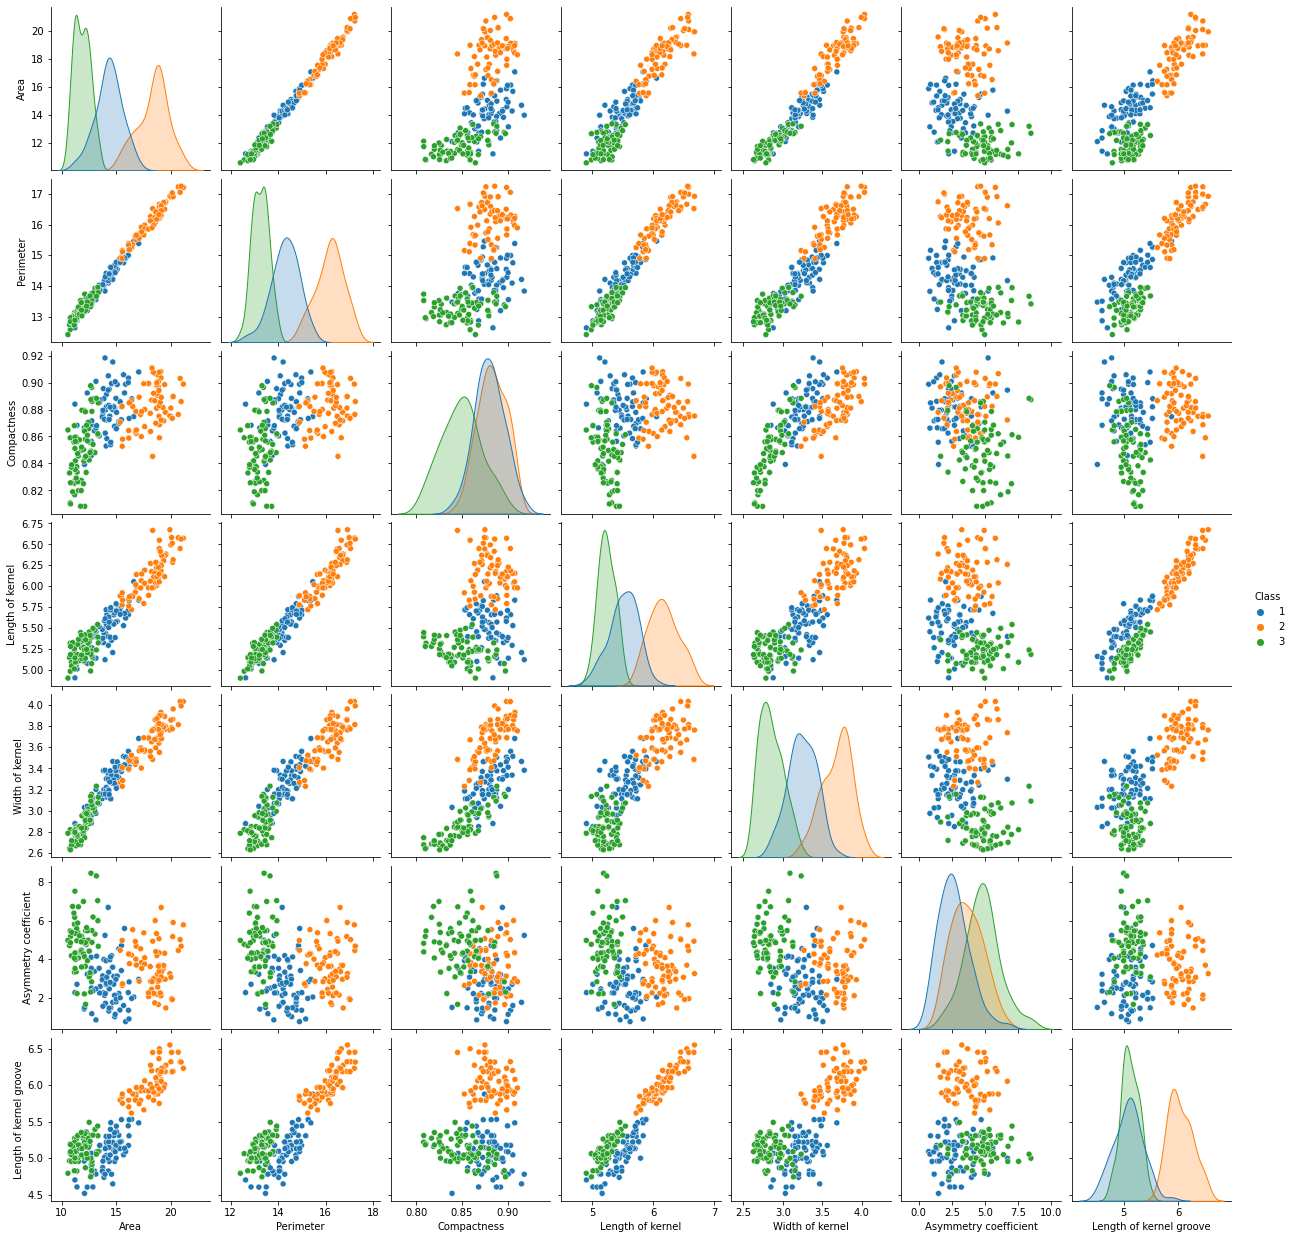

In [399]:
sns.pairplot(New_Wheat, hue='Class',palette='tab10')

## Step 4: Exploratory analysis

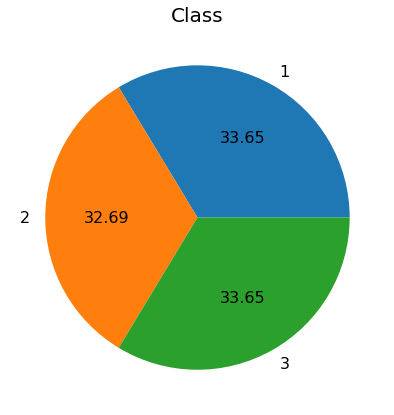

In [607]:
plt.figure(figsize=(10,7))
New_Wheat.groupby('Class').size().plot.pie(autopct='%.2f', textprops={'fontsize': 16})
plt.title('Class',fontsize=20)
plt.ylabel('');

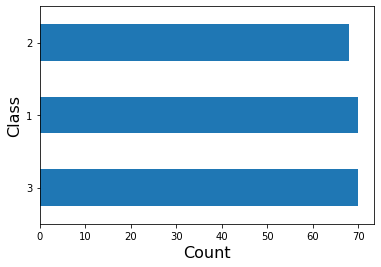

In [608]:
New_Wheat.Class.value_counts().plot(kind='barh')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Class', fontsize=16);

## Step 5:  Building the classifier

### ML Models

##### **Without Cleaning**

In [544]:
X_train, X_test, y_train, y_test = train_test_split(Wheat.iloc[:,:-1], Wheat['Class'], test_size=0.3, random_state=42)

In [545]:
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    neigh_predictions = neigh.predict(X_test)
    train_neigh_predictions = neigh.predict(X_train)
    print('No# of neighbors: {} -->'.format(i), 'Test Acc: {}'.format(accuracy_score(y_test, neigh_predictions)), '--> Train Acc: {}'.format(accuracy_score(y_train, train_neigh_predictions)))

No# of neighbors: 1 --> Test Acc: 0.873015873015873 --> Train Acc: 1.0
No# of neighbors: 2 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9659863945578231
No# of neighbors: 3 --> Test Acc: 0.873015873015873 --> Train Acc: 0.9387755102040817
No# of neighbors: 4 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9387755102040817
No# of neighbors: 5 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9183673469387755
No# of neighbors: 6 --> Test Acc: 0.873015873015873 --> Train Acc: 0.9319727891156463
No# of neighbors: 7 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9183673469387755
No# of neighbors: 8 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9319727891156463
No# of neighbors: 9 --> Test Acc: 0.9047619047619048 --> Train Acc: 0.9251700680272109
No# of neighbors: 10 --> Test Acc: 0.873015873015873 --> Train Acc: 0.9183673469387755
No# of neighbors: 11 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9251700680272109
No# of neighbors: 12 --> Test Acc: 0.8888888888888888 --> Tr

In [546]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train,y_train)
neigh_predictions = neigh.predict(X_test)
accuracy_score(y_test, neigh_predictions)

0.9047619047619048

In [547]:
neigh_CM = confusion_matrix(y_test, neigh_predictions)
neigh_CM_DF = pd.DataFrame(neigh_CM, columns=np.unique(y_test), index = np.unique(y_test))
neigh_CM_DF.index.name = 'Actual'
neigh_CM_DF.columns.name = 'Predicted'

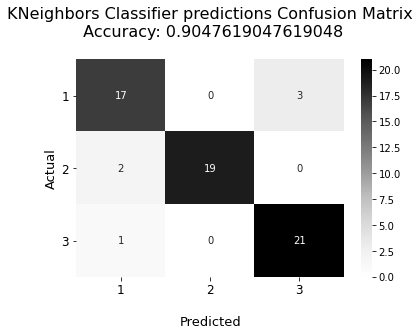

In [548]:
plt.figure(figsize=(6,4))
sns.heatmap(neigh_CM_DF, fmt='g', annot=True, cmap='Greys')
plt.title('KNeighbors Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, neigh_predictions)),fontsize=16)
plt.xlabel('\nPredicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

In [549]:
svc = SVC(C=100)
svc.fit(X_train,y_train)
svc_predictions = svc.predict(X_test)
print(accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))

0.9206349206349206
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.95      0.98        21
           3       0.88      0.95      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [550]:
svc_CM = confusion_matrix(y_test, svc_predictions)
svc_CM_DF = pd.DataFrame(svc_CM, columns=np.unique(y_test), index = np.unique(y_test))
svc_CM_DF.index.name = 'Actual'
svc_CM_DF.columns.name = 'Predicted'

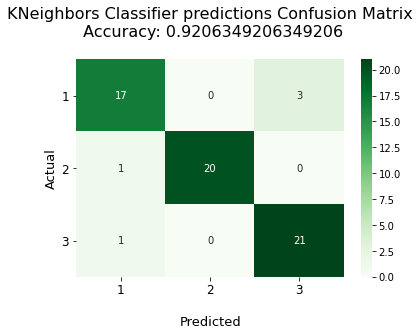

In [551]:
plt.figure(figsize=(6,4))
sns.heatmap(svc_CM_DF, fmt='g', annot=True, cmap='Greens')
plt.title('KNeighbors Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, svc_predictions)),fontsize=16)
plt.xlabel('\nPredicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

##### **With Cleaning**

In [552]:
X_train, X_test, y_train, y_test = train_test_split(New_Wheat.iloc[:,:-1], New_Wheat['Class'], test_size=0.3, random_state=42)

In [553]:

for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    neigh_predictions = neigh.predict(X_test)
    train_neigh_predictions = neigh.predict(X_train)
    print('No# of neighbors: {} -->'.format(i), 'Test Acc: {}'.format(accuracy_score(y_test, neigh_predictions)), '--> Train Acc: {}'.format(accuracy_score(y_train, train_neigh_predictions)))

No# of neighbors: 1 --> Test Acc: 0.9206349206349206 --> Train Acc: 1.0
No# of neighbors: 2 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9586206896551724
No# of neighbors: 3 --> Test Acc: 0.8888888888888888 --> Train Acc: 0.9517241379310345
No# of neighbors: 4 --> Test Acc: 0.9047619047619048 --> Train Acc: 0.9379310344827586
No# of neighbors: 5 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9310344827586207
No# of neighbors: 6 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9448275862068966
No# of neighbors: 7 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9310344827586207
No# of neighbors: 8 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9241379310344827
No# of neighbors: 9 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9241379310344827
No# of neighbors: 10 --> Test Acc: 0.9047619047619048 --> Train Acc: 0.9241379310344827
No# of neighbors: 11 --> Test Acc: 0.9206349206349206 --> Train Acc: 0.9172413793103448
No# of neighbors: 12 --> Test Acc: 0.9206349206349206 --

In [554]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
neigh_predictions = neigh.predict(X_test)
accuracy_score(y_test, neigh_predictions)

0.9206349206349206

In [555]:
neigh_CM = confusion_matrix(y_test, neigh_predictions)
neigh_CM_DF = pd.DataFrame(neigh_CM, columns=np.unique(y_test), index = np.unique(y_test))
neigh_CM_DF.index.name = 'Actual'
neigh_CM_DF.columns.name = 'Predicted'

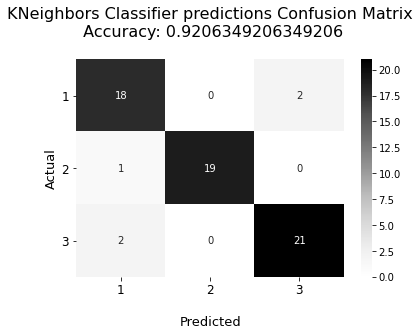

In [556]:
plt.figure(figsize=(6,4))
sns.heatmap(neigh_CM_DF, fmt='g', annot=True, cmap='Greys')
plt.title('KNeighbors Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, neigh_predictions)),fontsize=16)
plt.xlabel('\nPredicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

In [557]:
svc = SVC(kernel='poly', gamma=1)
svc.fit(X_train,y_train)
svc_predictions = svc.predict(X_test)
print(accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))

0.9682539682539683
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        20
           3       0.96      0.96      0.96        23

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



In [558]:
svc_CM = confusion_matrix(y_test, svc_predictions)
svc_CM_DF = pd.DataFrame(svc_CM, columns=np.unique(y_test), index = np.unique(y_test))
svc_CM_DF.index.name = 'Actual'
svc_CM_DF.columns.name = 'Predicted'

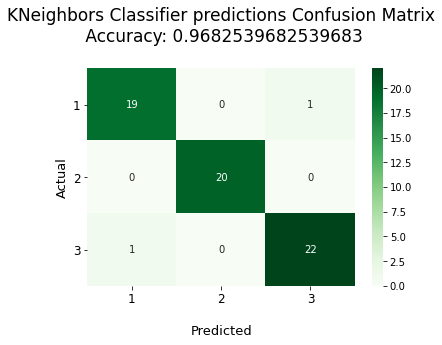

In [559]:
plt.figure(figsize=(6,4))
sns.heatmap(svc_CM_DF, fmt='g', annot=True, cmap='Greens')
plt.title('KNeighbors Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, svc_predictions)),fontsize=17)
plt.xlabel('\nPredicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

### Neural Network

##### **Without Cleaning**

In [577]:
X_train, X_test, y_train, y_test = train_test_split(Wheat.iloc[:,:-1], to_categorical(Wheat['Class']), test_size=0.2, random_state=42)

In [592]:
model = Sequential()
model.add(Dense(8, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [593]:
hist = model.fit(X_train, y_train[:,1:], epochs=300, verbose=0, batch_size=10)

In [594]:
loss, acc = model.evaluate(X_test,y_test[:,1:])

42/42 [==============================] - 0s 558us/step


In [595]:
print(f'Test Accuracy: {acc}')

Test Accuracy: 0.920634925365448


In [596]:
print(f'Maximum training Accuracy: {max(hist.history["accuracy"])}')

Maximum training Accuracy: 0.9722222685813904


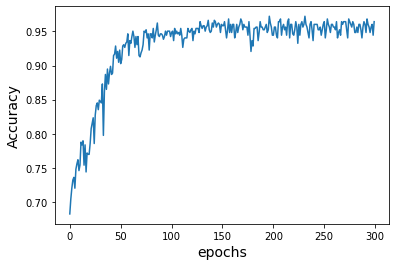

In [597]:
plt.plot(range(len(hist.history['accuracy'])), hist.history['accuracy'])
plt.xlabel('epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14);

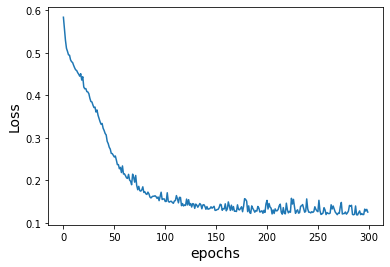

In [598]:
plt.plot(range(len(hist.history['accuracy'])), hist.history['loss'])
plt.xlabel('epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14);

##### **With Cleaning**

In [599]:
X_train, X_test, y_train, y_test = train_test_split(New_Wheat.iloc[:,:-1], to_categorical(New_Wheat['Class']), test_size=0.2, random_state=42)

In [600]:
model = Sequential()
model.add(Dense(8, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [601]:
hist = model.fit(X_train, y_train[:,1:], epochs=500, verbose=0, batch_size=10)

In [602]:
loss, acc = model.evaluate(X_test,y_test[:,1:])

42/42 [==============================] - 0s 814us/step


In [603]:
print(f'Test Accuracy: {acc}')

Test Accuracy: 0.9682539701461792


In [604]:
print(f'Maximum training Accuracy: {max(hist.history["accuracy"])}')

Maximum training Accuracy: 0.959839403629303


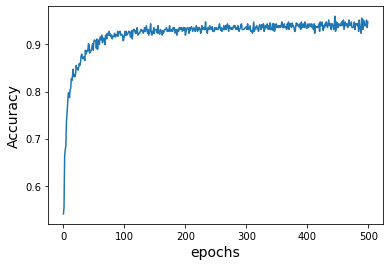

In [605]:
plt.plot(range(len(hist.history['accuracy'])), hist.history['accuracy'])
plt.xlabel('epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14);

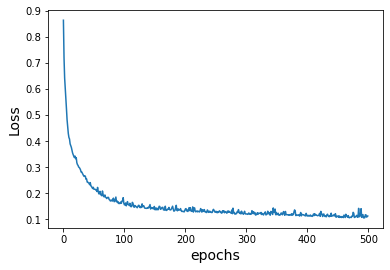

In [606]:
plt.plot(range(len(hist.history['accuracy'])), hist.history['loss'])
plt.xlabel('epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14);

## Step 6:  Reproducibility

In [576]:
!pip install watermark

In [336]:
%load_ext watermark

In [338]:
%watermark -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,keras

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.18.1

numpy     : 1.19.1
pandas    : 1.1.3
sklearn   : 0.22.1
matplotlib: 3.3.1
seaborn   : 0.11.0
keras     : 2.3.1

Compiler    : MSC v.1915 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
CPU cores   : 4
Architecture: 64bit

